# 가위바위보 분류기 프로젝트
----

## 0. 환경
* Ubuntu 18.04
* TensorFlow 2.4.1
* scikit learn 0.23.0
* numpy 1.19.5
* Keras 2.4.3
* conda 4.10.1

## 1. 데이터 수집
__* https://teachablemachine.withgoogle.com/__
* __1) 위 teachablemachine에서 가위, 바위, 보 데이터를 각각 제작 후 저장__
 * 여러 각도, 크기, 동료 데이터, 좌우 반전 등 고려
 * train: 4286개, test: 300개  


## 2. 디렉토리 생성
* __1) 각각의 폴더를 생성__
 * mkdir -p ~/aiffel/rock_scissor_paper/scissor
 * mkdir -p ~/aiffel/rock_scissor_paper/rock
 * mkdir -p ~/aiffel/rock_scissor_paper/paper
 * ls -l ~/aiffel/rock_scissor_paper(폴더 생성 여부 확인)


## 3. 이미지 업로드
* __1) 데이터 업로드 후 압축파일 해제__
 * cd  ~/aiffel/rock_scissor_paper/rock
 * unzip rock.zip
 * paper와 scissor에도 각각 압축 해제

## 4. 라이브러리 불러오기

In [1]:
import os, glob
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout
from keras.layers.advanced_activations import PReLU

## 5. Resize 및 데이터 불러오기

* 가위

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지 경로
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1427  images to be resized.
1427  images resized.
가위 이미지 resize 완료!


* 바위

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지 경로
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1432  images to be resized.
1432  images resized.
바위 이미지 resize 완료!


* 보

In [4]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 보 이미지 경로
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1427  images to be resized.
1427  images resized.
보 이미지 resize 완료!


* 데이터 불러오기 및 라벨링

In [5]:
import numpy as np

def load_data(img_path, number_of_data):  # 4286개, 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

## 6. train 정규화

In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 4286)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 4286 입니다.
x_train shape: (4286, 28, 28, 3)
y_train shape: (4286,)


* train 이미지 확인

라벨:  0


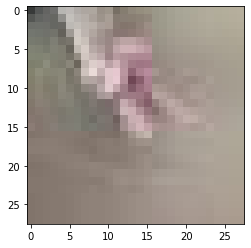

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 7. 모델 생성

In [8]:
n_channel_1=256
n_channel_2=512
n_channel_3=512
n_dense=256
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation=PReLU(), input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation=PReLU()))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation=PReLU()))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation=PReLU(), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 256)       180224    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 512)       1242112   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 512)         2

## 8. 모델 학습

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/15
134/134 [==============================] - 13s 55ms/step - loss: 10.4411 - accuracy: 0.3745
Epoch 2/15
134/134 [==============================] - 4s 29ms/step - loss: 1.1257 - accuracy: 0.5785
Epoch 3/15
134/134 [==============================] - 4s 29ms/step - loss: 0.8620 - accuracy: 0.7483
Epoch 4/15
134/134 [==============================] - 4s 29ms/step - loss: 0.6826 - accuracy: 0.8238
Epoch 5/15
134/134 [==============================] - 4s 29ms/step - loss: 0.6438 - accuracy: 0.8345
Epoch 6/15
134/134 [==============================] - 4s 29ms/step - loss: 0.5543 - accuracy: 0.8733
Epoch 7/15
134/134 [==============================] - 4s 29ms/step - loss: 0.5041 - accuracy: 0.8869
Epoch 8/15
134/134 [==============================] - 4s 29ms/step - loss: 0.4148 - accuracy: 0.9242
Epoch 9/15
134/134 [==============================] - 4s 29ms/step - loss: 0.3799 - accuracy: 0.9302
Epoch 10/15
134/134 [==============================] - 4s 29ms/step - loss: 0.3495 - accu

## 9. 테스트
* 앞에서 train/test set을 같이 지정해서 분할하지 않았기 때문에 test set을 지정하고 train과 같은 방법으로 처리한다.
* test set 디렉토리 생성
 * mkdir -p ~/aiffel/rock_scissor_paper/test
* test set Resize
* test set 라벨링
* test set 정규화 및 지정

In [10]:
##### rock resize
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

##### paper resize
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

##### scissor resize
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [11]:
##### test set 정규화 및 지정
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [12]:
print('--'*30)
print(x_test.shape)
print(y_test.shape)
print('--'*30)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

------------------------------------------------------------
(300, 28, 28, 3)
(300,)
------------------------------------------------------------
10/10 - 2s - loss: 0.7831 - accuracy: 0.8867
test_loss: 0.7830678224563599 
test_accuracy: 0.8866666555404663


## 10. 확인
* 모델이 추론한 확률값.
* 시각화

In [13]:
##### predict #####
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  
print('model.predict() 결과 : ', predicted_result[idx])
print('-'*50)
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9887544e-01 6.3816180e-05 1.0607475e-03]
--------------------------------------------------
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


## 11. 모델이 예측 실패한 부분 확인.

예측확률분포: [1.1597855e-05 7.5167912e-01 2.4830939e-01]
라벨: 2, 예측결과: 1


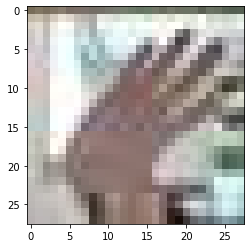

예측확률분포: [0.01415256 0.5587337  0.42711374]
라벨: 2, 예측결과: 1


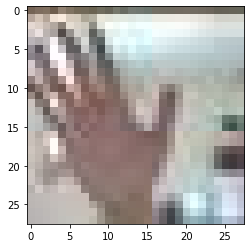

예측확률분포: [0.00121582 0.9807966  0.01798752]
라벨: 2, 예측결과: 1


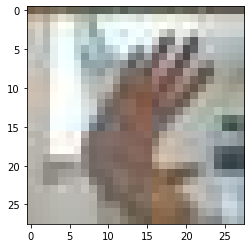

예측확률분포: [6.9134223e-04 9.9419075e-01 5.1179482e-03]
라벨: 2, 예측결과: 1


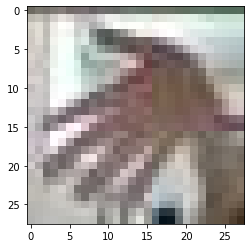

예측확률분포: [1.6922424e-08 1.3361216e-01 8.6638784e-01]
라벨: 1, 예측결과: 2


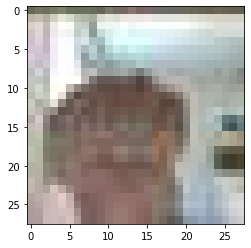

In [14]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list에서 random한 5개 확인
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 12. 생각

* test set을 바꿨을 때 test_accuracy는 0.58~0.91%까지 변함.
* test loss도 1.1~0.4까지 변함.
* 모델에서 layer 마다 channel을 늘려주었고 overfiting을 방지하기 위해 Dropout 추가
 * Dropout은 node를 random하게 제거(0.2는 20%)
 * 0.2를 선택한 이유는 0.5(50%)로 setting 했을 때 학습이 제대로 진행되지 않았음.
* ReLU -> PReLU 변경
 * 기존의 ReLU는 음수 값을 모두 0으로 바꿈
 * PReLU는 음수에 대한 gradient를 변수로 두고 학습을 통한 업데이트를 실행.
 * ReLU를 사용해도 별다른 차이를 못느꼈음.(ReLU로 학습시켰을 때 별다른 차이가 없었음)
* kernel_regularizer=keras.regularizers.l2(0.001)
 * The L2 regularization penalty is computed as: loss = l2 * reduce_sum(square(x))
 * 패널티를 추가함으로 overfiting을 방지하려 시도하였음
* 더 많은 패턴을 학습하고자 하는 생각에 Conv2D 추가